Build a
network consisting of four artificial neurons. Two neurons receive inputs to the network,
and the other two give outputs from the network.

In [1]:
import random

In [2]:
def ann_output(inputs, weights):
    salida1 = inputs[0]*weights[0] + inputs[1]*weights[2]
    salida2 = inputs[0]*weights[1] + inputs[1]*weights[3]
    print(f"El input {inputs} tiene como salida {[salida1,salida2]} ")
    return([salida1, salida2])
    


1.- Now, set all the weights to be equal to one. This means that the information will flow
unaffected. Compute the outputs of the network for the following inputs: (1,1), (1,0), (0,1),
(0,0), (-1,1), (-1,-1). 

In [3]:
pesos = [1]*4
entradas=[[1,1],[1,0],[0,1],[0,0],[-1,1],[-1,-1]]

In [4]:
for entrada in entradas:
    ann_output(entrada,pesos)

El input [1, 1] tiene como salida [2, 2] 
El input [1, 0] tiene como salida [1, 1] 
El input [0, 1] tiene como salida [1, 1] 
El input [0, 0] tiene como salida [0, 0] 
El input [-1, 1] tiene como salida [0, 0] 
El input [-1, -1] tiene como salida [-2, -2] 


2.- Good. Now, choose weights among 0.5, 0, and -0.5, and set them randomly along the
network. Compute the outputs for the same inputs as above. Change some weights and see
how the behaviour of the networks changes.Which weights are more critical (if you change
those weights, the outputs will change more dramatically)? 

In [6]:
pesos2 = [0.5, -0.5, 0, 0.5]

In [7]:
for entrada in entradas:
    ann_output(entrada,pesos2)


El input [1, 1] tiene como salida [0.5, 0.0] 
El input [1, 0] tiene como salida [0.5, -0.5] 
El input [0, 1] tiene como salida [0.0, 0.5] 
El input [0, 0] tiene como salida [0.0, 0.0] 
El input [-1, 1] tiene como salida [-0.5, 1.0] 
El input [-1, -1] tiene como salida [-0.5, 0.0] 


3.-Now, suppose we want a network like the one we are working with, such that the
outputs should be the inputs in inverse order (e.g. (0.3,0.7)->(0.7,0.3)).

In [ ]:
pesos3 = [0,1,1,0]

entrada3 = [0.3,0.7]
ann_output(entrada3,pesos3)

4.-Now, let’s set thresholds to the neurons. This is, if the previous output of the neuron
(weighted sum of the inputs) is greater than the threshold of the neuron, the output of the
neuron will be one, and zero otherwise. Set thresholds to a couple of the already developed
networks, and see how this affects their behaviour

In [ ]:
def ann_output_thresholds(inputs, weights,thresholds):
    neuronas = [inputs[0]*weights[0] + inputs[1]*weights[2], inputs[0]*weights[1] + inputs[1]*weights[3] ]
    resultados = [0,0]
    for i in range(2):
        if neuronas[i] >= thresholds[i]:
            resultados[i]=1
        else:
            pass
    print(f"las neuronas {neuronas}")
    print(f"los umbrales {thresholds}")
    return(f"Los inputs {inputs} tienen como resultado {resultados}")

In [ ]:
ann_output_thresholds(entrada3,pesos2, [5 ,0.05] )

In [ ]:
ann_output_thresholds(entrada3,pesos2, [random.random(),random.random()] )

Now, suppose we have a network which will receive for inputs only zeroes and/or
ones. Adjust the weights and thresholds of the neurons so that the output of the first output
neuron will be the conjunction (AND) of the network inputs (one when both inputs are
one, zero otherwise), and the output of the second output neuron will be the disjunction
(OR) of the network inputs (zero in both inputs are zeroes, one otherwise). You can see
that there is more than one network which will give the requested result

In [ ]:
def logical_ann_1(entrada):
    neurona_and = min(entrada[0],entrada[1])
    neurona_or = max(entrada[0],entrada[1])
    print(f"output (and) es {neurona_and}" )
    print(f"output (or) es {neurona_or}" )
    return(neurona_and, neurona_or)

In [ ]:
logical_ann_1([0,1])

In [ ]:
logica_pesos = [0.5, 0.5, 1, 1]
ann_output_thresholds([0,0], logica_pesos, [1,0.5] )

# Backpropagation

In [8]:
import numpy as np

input_size = 3
hidden_size = 2
output_size = 3

W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def forward(X):

    z1 = np.dot(X, W1)
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2)
    y_hat = tanh(z2)
    
    print(f"entra {X}")
    print(f"sale {y_hat} \n")
     
    return y_hat, z1, a1, z2


X = np.array([1.0, 0.25, -0.5])
y_hat = forward(X)

entra [ 1.    0.25 -0.5 ]
sale [ 0.18049906  0.47696341 -0.69353341] 



In [9]:
X_1 = np.array([1.0, 0.25, -0.5]).reshape(1, -1) 
Y_target = np.array([1.0, -1.0, 0.0])


In [10]:
def sigmoid_d(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh_d(x):
    return 1 - np.tanh(x) ** 2

In [11]:
def backward(X, Y_target, y_hat, z1, a1, z2):
    delta3 = (y_hat - Y_target)*tanh_d(z2)
    dW2 = np.dot(a1.T, delta3)
    
    delta2 = np.dot(delta3, W2.T) * sigmoid_d(z1)
    dW1 = np.dot(X.reshape(-1,1), delta2.reshape(1,-1))
    
    
    return dW1, dW2

In [12]:
learning_rate = 0.2  #eta
repeticiones = 10000 
error = []

for i in range(repeticiones):
    y_hat, z1, a1, z2 = forward(X_1)
    er = np.linalg.norm(y_hat - Y_target)
    error.append(er)
    
    print(f"epoca {i} tiene error: {er}")
    
    dW1, dW2 = backward(X_1, Y_target, y_hat, z1, a1, z2)
    
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2

entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.18049906  0.47696341 -0.69353341]] 

epoca 0 tiene error: 1.825922043412387
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.34455665  0.26003227 -0.64694258]] 

epoca 1 tiene error: 1.5607120162825205
entra [[ 1.    0.25 -0.5 ]]
sale [[ 4.57119653e-01  4.25850588e-04 -5.91416797e-01]] 

epoca 2 tiene error: 1.2827099366642738
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.53569556 -0.22800858 -0.52741563]] 

epoca 3 tiene error: 1.0438949255857912
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.59235618 -0.38645989 -0.45717248]] 

epoca 4 tiene error: 0.8669553793792129
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.63474267 -0.49054962 -0.38428321]] 

epoca 5 tiene error: 0.7352728734389523
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.66758824 -0.56163261 -0.31320372]] 

epoca 6 tiene error: 0.6330561735458586
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.69378991 -0.6127667  -0.24817059]] 

epoca 7 tiene error: 0.5525422052423636
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.71518058 -0.65121714 -0.1920236

entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.83165952e-01 -9.83487860e-01  4.43412704e-05]] 

epoca 1449 tiene error: 0.02358045612854775
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.83172073e-01 -9.83493868e-01  4.43067454e-05]] 

epoca 1450 tiene error: 0.02357187883467015
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.83178188e-01 -9.83499870e-01  4.42722710e-05]] 

epoca 1451 tiene error: 0.023563310649284862
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.83184297e-01 -9.83505865e-01  4.42378472e-05]] 

epoca 1452 tiene error: 0.02355475155640722
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.83190399e-01 -9.83511854e-01  4.42034737e-05]] 

epoca 1453 tiene error: 0.023546201540091818
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.83196494e-01 -9.83517837e-01  4.41691506e-05]] 

epoca 1454 tiene error: 0.023537660584431772
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.83202583e-01 -9.83523813e-01  4.41348777e-05]] 

epoca 1455 tiene error: 0.02352912867355955
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.83208666e-01 -9.83529783e-01  4.41006549e-

entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.88236327e-01 -9.88460074e-01  2.05146497e-05]] 

epoca 2867 tiene error: 0.01647890539775536
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.88238474e-01 -9.88462177e-01  2.05065661e-05]] 

epoca 2868 tiene error: 0.016475899883804233
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.88240619e-01 -9.88464280e-01  2.04984885e-05]] 

epoca 2869 tiene error: 0.01647289597687545
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.88242764e-01 -9.88466381e-01  2.04904169e-05]] 

epoca 2870 tiene error: 0.016469893675546667
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.88244907e-01 -9.88468481e-01  2.04823512e-05]] 

epoca 2871 tiene error: 0.01646689297839759
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.88247049e-01 -9.88470580e-01  2.04742916e-05]] 

epoca 2872 tiene error: 0.016463893884009418
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.88249190e-01 -9.88472678e-01  2.04662379e-05]] 

epoca 2873 tiene error: 0.016460896390965457
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.88251329e-01 -9.88474775e-01  2.04581901e

entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.90478519e-01 -9.90656874e-01  1.29796475e-05]] 

epoca 4298 tiene error: 0.013339893866473024
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.90479674e-01 -9.90658005e-01  1.29762327e-05]] 

epoca 4299 tiene error: 0.013338277509903062
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.90480828e-01 -9.90659136e-01  1.29728195e-05]] 

epoca 4300 tiene error: 0.013336661728699238
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.90481982e-01 -9.90660266e-01  1.29694080e-05]] 

epoca 4301 tiene error: 0.013335046522522237
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.90483135e-01 -9.90661396e-01  1.29659982e-05]] 

epoca 4302 tiene error: 0.013333431891033214
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.90484288e-01 -9.90662526e-01  1.29625900e-05]] 

epoca 4303 tiene error: 0.013331817833893405
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.90485441e-01 -9.90663655e-01  1.29591836e-05]] 

epoca 4304 tiene error: 0.013330204350764515
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.90486593e-01 -9.90664784e-01  1.295577

entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.91833545e-01 -9.91984212e-01  9.29764913e-06]] 

epoca 5772 tiene error: 0.011443073531598947
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.91834281e-01 -9.91984932e-01  9.29582636e-06]] 

epoca 5773 tiene error: 0.011442043870026076
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.91835016e-01 -9.91985652e-01  9.29400427e-06]] 

epoca 5774 tiene error: 0.011441014481016996
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.91835752e-01 -9.91986372e-01  9.29218284e-06]] 

epoca 5775 tiene error: 0.011439985364451977
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.91836487e-01 -9.91987092e-01  9.29036209e-06]] 

epoca 5776 tiene error: 0.01143895652021169
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.91837221e-01 -9.91987812e-01  9.28854202e-06]] 

epoca 5777 tiene error: 0.011437927948176638
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.91837956e-01 -9.91988532e-01  9.28672261e-06]] 

epoca 5778 tiene error: 0.011436899648227571
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.91838690e-01 -9.91989251e-01  9.2849038

entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.92743030e-01 -9.92875102e-01  7.18826929e-06]] 

epoca 7245 tiene error: 0.010169947399793199
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.92743550e-01 -9.92875611e-01  7.18714597e-06]] 

epoca 7246 tiene error: 0.01016921976463337
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.92744070e-01 -9.92876121e-01  7.18602298e-06]] 

epoca 7247 tiene error: 0.010168492282779976
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.92744589e-01 -9.92876630e-01  7.18490032e-06]] 

epoca 7248 tiene error: 0.01016776495417955
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.92745109e-01 -9.92877138e-01  7.18377799e-06]] 

epoca 7249 tiene error: 0.010167037778778707
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.92745628e-01 -9.92877647e-01  7.18265599e-06]] 

epoca 7250 tiene error: 0.010166310756523824
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.92746147e-01 -9.92878156e-01  7.18153432e-06]] 

epoca 7251 tiene error: 0.010165583887361437
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.92746666e-01 -9.92878664e-01  7.18041298

entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.93404064e-01 -9.93522658e-01  5.83500061e-06]] 

epoca 8710 tiene error: 0.009244585504114403
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.93404457e-01 -9.93523043e-01  5.83424181e-06]] 

epoca 8711 tiene error: 0.00924403614860259
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.93404849e-01 -9.93523427e-01  5.83348320e-06]] 

epoca 8712 tiene error: 0.00924348688929668
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.93405241e-01 -9.93523811e-01  5.83272477e-06]] 

epoca 8713 tiene error: 0.009242937726168647
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.93405633e-01 -9.93524196e-01  5.83196653e-06]] 

epoca 8714 tiene error: 0.009242388659190779
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.93406026e-01 -9.93524580e-01  5.83120848e-06]] 

epoca 8715 tiene error: 0.009241839688334965
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.93406418e-01 -9.93524964e-01  5.83045061e-06]] 

epoca 8716 tiene error: 0.00924129081357334
entra [[ 1.    0.25 -0.5 ]]
sale [[ 9.93406810e-01 -9.93525348e-01  5.82969293e

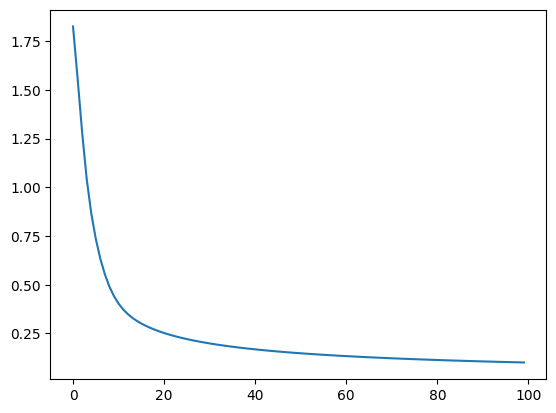

In [13]:
import matplotlib.pyplot as plt

dominio=[x for x in range(100)]
plt.plot(dominio, error[:100])
plt.show()
